# Greedy Algorithms

Idee:
- Löse ein Problem, indem
    1. mit einer einfachen Teillösung begonnen und diese
    2. schrittweise zu einer globalen Lösung erweitert wird.
- Bei Greedy-Algorithmen handelt es sich um einen top-down Ansatz.
    - Wähle dabei immer den bestmöglichen Schritt, ohne Berücksichtigung zukünftiger Schritte:
    - „Nimm immer das größte Stück zuerst.“
    - Engl.: greedy = gierig, gefräßig.

## Problem 1: Coin Change Problem

https://leetcode.com/problems/lemonade-change/description/

Input: bills = [5,5,5,10,20]
Output: true

Input: bills = [5,5,10,10,20]
Output: false

In [21]:
inputA = [5,5,5,10,20]
inputB = [5,5,10,10,20]

def solve(problem):
    money = {5: 0, 10: 0, 20:0}
    for x in problem:
        if x == 5:
            money[5] += 1
        elif x == 10:
            money[5] -= 1
            if money[5] < 0:
                print(money)
                return False
            money[10] += 1
        elif x == 20:
            change = 0
            if money[10] > 0:
                money[10] -= 1
                change += 10
            while change != 15:
                money[5] -= 1
                change += 5
                if money[5] < 0:
                    print(money)
                    return False
            money[20] += 1
        else:
            print("Wrong bill: " + x)
            return False
    print(money)
    return True


print(solve(inputA))
print(solve(inputB))

{5: 1, 10: 0, 20: 1}
True
{5: -1, 10: 1, 20: 0}
False


nicht das effizienteste aber funktioniert. While schleife kann weg und durch if else ersetzt werden

## Problem 2: Non-overlapping Intervals

https://leetcode.com/problems/non-overlapping-intervals/description/

Example 1:

Input: intervals = [[1,2],[2,3],[3,4],[1,3]]
Output: 1
Explanation: [1,3] can be removed and the rest of the intervals are non-overlapping.


Example 2:

Input: intervals = [[1,2],[1,2],[1,2]]
Output: 2
Explanation: You need to remove two [1,2] to make the rest of the intervals non-overlapping.


Example 3:

Input: intervals = [[1,2],[2,3]]
Output: 0
Explanation: You don't need to remove any of the intervals since they're already non-overlapping.

In [ ]:
def eraseOverlapIntervals(self, intervals):
    """
    :type intervals: List[List[int]]
    :rtype: int
    """
    intervals.sort(key=lambda x: x[1])

    removecount = 0
    previous_end = float("-inf")
    for start, end in intervals:
        if start >= previous_end:
            # passt keine Überschneidung
            previous_end = end
        else:
            # Überschneidung
            removecount += 1
    return removecount


Wenn die Liste sortiert ist dann ist es easy zu vergleichen.

## Problem 3: Maximize Sum Of Array After K Negations

https://leetcode.com/problems/maximize-sum-of-array-after-k-negations/

Given an integer array nums and an integer k, modify the array in the following way:

choose an index i and replace nums[i] with -nums[i].
You should apply this process exactly k times. You may choose the same index i multiple times.

Return the largest possible sum of the array after modifying it in this way.

Input: nums = [2,-3,-1,5,-4], k = 2

Output: 13

Explanation: Choose indices (1, 4) and nums becomes [2,3,-1,5,4].

In [25]:
def largestSumAfterKNegations(nums, k):
    """
    :type nums: List[int]
    :type k: int
    :rtype: int
    """
    negative_values = 0
    for x in nums:
        if x < 0:
            negative_values += 1

    while k != 0:
        if k % 2 == 1:
            minimum = min(nums)
            index = nums.index(minimum)
            nums[index] = -nums[index]
            if minimum < 0:
                negative_values -= 1
            else:
                negative_values += 1
            k -= 1
        else:
            if negative_values >= 2:
                minimum = min(nums)
                index = nums.index(minimum)
                nums[index] = -nums[index]
                negative_values -= 1

                minimum = min(nums)
                index = nums.index(minimum)
                nums[index] = -nums[index]
                negative_values -= 1
                k -= 2
            elif negative_values == 1:
                minimum = min(nums)
                index = nums.index(minimum)
                nums[index] = -nums[index]
                negative_values -= 1

                minimum = min(nums)
                index = nums.index(minimum)
                nums[index] = -nums[index]
                negative_values += 1
                k -= 2
            else:
                k -= 2

    return sum(nums)

largestSumAfterKNegations([-2,5,0,2,-2], 3)

11

krass unperformant kann man mit ner Heapqueue sehr einfach machen

In [ ]:
from typing import List
import heapq


class Solution:
    def largestSumAfterKNegations(self, nums: List[int], k: int) -> int:
        heapq.heapify(nums)
        for _ in range(k):
            smallest = heapq.heappop(nums)
            heapq.heappush(nums, -smallest)
        return sum(nums)

## Problem 4: Network Delay Time

https://leetcode.com/problems/network-delay-time/description/

You are given a network of n nodes, labeled from 1 to n. You are also given times, a list of travel times as directed edges times[i] = (ui, vi, wi), where ui is the source node, vi is the target node, and wi is the time it takes for a signal to travel from source to target.

We will send a signal from a given node k. Return the minimum time it takes for all the n nodes to receive the signal. If it is impossible for all the n nodes to receive the signal, return -1.


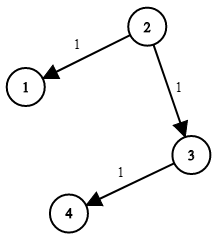

In [29]:
from collections import defaultdict

class Solution(object):

    def networkDelayTime(self, times, n, k):
        """
        :type times: List[List[int]]
        :type n: int
        :type k: int
        :rtype: int
        """
        graph = defaultdict(list)
        for u,v,w in times:
            graph[u].append((v, w))

        heap = [(0, k)]
        dist = {}

        while heap:
            time, node = heapq.heappop(heap)
            if node in dist:
                continue
            dist[node] = time
            for neighbor, weight in graph[node]:
                if neighbor not in dist:
                    heapq.heappush(heap, (time + weight, neighbor))

        if len(dist) < n:
            return -1

        return max(dist.values())


Merksatz:
Dijkstra verarbeitet jeden Knoten genau dann, wenn der kürzeste Weg zu ihm bekannt ist. Danach kann kein besserer mehr kommen.
Deshalb funktioniert Dijkstra nur mit einem Min-Heap / Priority Queue korrekt.

## Greedy Graph Coloring

Gegeben ist ein ungerichteter Graph mit n = 6 Knoten.
Die Knoten sind nummeriert von 0 bis 5.
Die Nachbarschaften sind wie folgt gegeben:

adjacency = {
    0: [1, 2],
    1: [0, 2, 3],
    2: [0, 1, 3],
    3: [1, 2, 4],
    4: [3, 5],
    5: [4]
}

Deine Aufgabe ist es, die kleinste gültige Einfärbung der Knoten mit einem Greedy-Algorithmus zu berechnen.
Zwei benachbarte Knoten dürfen nicht dieselbe Farbe haben.
Du darfst beliebig viele Farben verwenden, aber dein Ziel ist es, möglichst wenige Farben zu benutzen.

In [36]:
adjacency = {
    0: [1, 2],
    1: [0, 2, 3],
    2: [0, 1, 3],
    3: [1, 2, 4],
    4: [3, 5],
    5: [4]
}

def colorGraph(adj):
    colors =  {}
    for node, neighbors in adj.items():
        neighborColors = []
        ownColor = 0
        if node not in colors.keys():
            colors[node] = None
        for neighbor in neighbors:
            if neighbor in colors and colors[neighbor] is not None:
                neighborColors.append(colors[neighbor])
        while ownColor in neighborColors:
            ownColor += 1
        colors[node] = ownColor

    return colors

print(colorGraph(adjacency))


{0: 0, 1: 1, 2: 2, 3: 0, 4: 1, 5: 0}


## MST Minimal Spanning Tree

Prim: Erweiterung von Dijkstra algo, von Startknoten aus wird immer der billigste Knoten besucht, so zu jeder zeit MST

Kruskal: Wald und PriorityQueue mit den Kanten. Billigste Kante wird genommen und die beiden Knoten zu einem Baum zsm gemerged bis nur noch ein Baum übrig ist.

Problem: Min Cost to Connect All Points

https://leetcode.com/problems/min-cost-to-connect-all-points/description/

In [9]:
x = [[0,0],[2,2],[3,10],[5,2],[7,0]]

def get_all_edges(points):
    edges = []
    n = len(points)
    for i in range(n):
        x1, y1 = points[i]
        for j in range(i + 1, n):
            x2, y2 = points[j]
            dist = abs(x1 - x2) + abs(y1 - y2)
            edges.append((dist, i, j))  # Format: (cost, from, to)
    return edges

class UnionFind:
    def __init__(self, size):
        self.parent = list(range(size))

    def find(self, x):
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]

    def union(self, x, y):
        rootX = self.find(x)
        rootY = self.find(y)
        if rootX == rootY:
            return False
        self.parent[rootY] = rootX
        return True

def minCostConnectPoints(points):
    n = len(points)
    edges = get_all_edges(points)
    edges.sort()
    print(edges)

    forest = UnionFind(n)
    total = 0
    count = 0

    for cost, u, v in edges:
        if forest.union(u,v):
            total += cost
            count += 1
            if count == n -1:
                break

    return total

minCostConnectPoints(x)

[(3, 1, 3), (4, 0, 1), (4, 3, 4), (7, 0, 3), (7, 0, 4), (7, 1, 4), (9, 1, 2), (10, 2, 3), (13, 0, 2), (14, 2, 4)]


20

Funktioniert aber exceeded das Zeitlimit für den letzten Testcase auf Leetcode

Das ganze mit Prims algo:

In [10]:
import heapq

x = [[0,0],[2,2],[3,10],[5,2],[7,0]]

def min_cost_connect_points(points):
    n = len(points)
    visited = [False] * n
    min_heap = [(0, 0)]  # (cost, point_index)
    total_cost = 0
    edges_used = 0

    while edges_used < n:
        cost, u = heapq.heappop(min_heap)

        if visited[u]:
            continue

        visited[u] = True
        total_cost += cost
        edges_used += 1

        for v in range(n):
            if not visited[v]:
                dist = abs(points[u][0] - points[v][0]) + abs(points[u][1] - points[v][1])
                heapq.heappush(min_heap, (dist, v))

    return total_cost

min_cost_connect_points(x)

20